
# Pre Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/minor_project_sem6/dataset
import matplotlib.pyplot as plt
# import os
import csv
import re
# from sklearn.utils import class_weight as cw
# import shutil
# import string
import tensorflow as tf
# from tensorflow.keras import regularizers
from tensorflow.keras import layers
# from tensorflow.keras import losses
# from collections import Counter
from keras.models import Sequential
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
import seaborn as sns
import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, MaxPooling2D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
    # Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional, GRU
# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
# from keras.layers.pooling import _GlobalPooling1D
from tensorflow.keras.regularizers import l2
# import pydot
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive
/content/drive/MyDrive/minor_project_sem6/dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:

# 0 - negative
# 1 - positive
def preprocess_text(sen):
    sentence = sen.lower()
    
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [3]:
# train_data = pd.read_csv("copy_of_hotel.csv")
# # sns.countplot(x = 'label', data=train_data, palette = "Set2")
# train_data['text'][0]

In [ ]:
train = input('Enter train dataset: ')
test = input('Enter test dataset: ')

train_data= pd.read_csv(train + ".csv")
train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] > 2
train_data = train_data[mask]

# Let's observe distribution of positive / negative sentiments in dataset
sns.countplot(x='label', data=train_data)

train_data['text'] = train_data['text'].apply(preprocess_text)


test_data= pd.read_csv(test + ".csv")
test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split())) 
# print(test_data)
mask = test_data['Num_words_text'] >2
test_data = test_data[mask]

test_data['text'] = test_data['text'].apply(preprocess_text)
#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

#[name = movie     , pos = 19981, neg = 20019, total = 40000]
#[name = hotel     , pos = 15093, neg =  5398, total = 20400]
#[name = disneyland, pos = 33921, neg =  8735, total = 42600]
sns.countplot(x='label', data=test_data)

<Axes: xlabel='label', ylabel='count'>

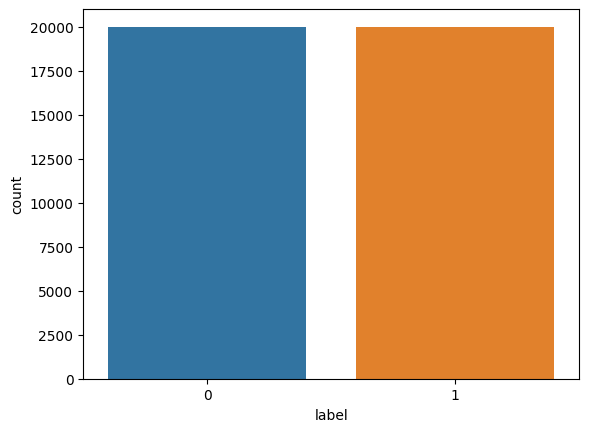

In [42]:
sns.countplot(x='label', data=train_data)


In [43]:
##--------------------------------------------##
num_words = 20000 
tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['text'].tolist())

# print(str(tokenizer.texts_to_sequences(['nice hotel expensive'])))

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)

X_test, X_tune, y_test, y_tune = train_test_split(test_data['text'].tolist(),\
                                                      test_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = test_data['label'].tolist(),\
                                                      random_state=1)

# X_train, X_train_test, y_train, y_train_test = train_test_split(X_train,y_train,\
#                                                       test_size=0.2,\
#                                                       # stratify = train_data['label'].tolist(),\
#                                                       random_state=0)
# x_train_test = np.array(tokenizer.texts_to_sequences(X_train_test) )

# random_state = 0 -> shuffle else same everytime
x_train = np.array(tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_tune  = np.array(tokenizer.texts_to_sequences(X_tune))
x_test  = np.array( tokenizer.texts_to_sequences(X_test))

maxlen = 100;

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_tune  = pad_sequences(x_tune ,padding='post',maxlen=maxlen)
x_test  = pad_sequences(x_test, padding='post', maxlen=maxlen)
# x_train_test = pad_sequences(x_train_test, padding='post', maxlen=maxlen)

# le = LabelEncoder()

# train_labels = le.fit_transform(y_train)
# train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels)) ##
# tune_label=le.transform(y_tune) # new_train_lebel
# tune_label=np.asarray( tf.keras.utils.to_categorical(tune_label))

# train_test_labels = le.transform(y_train_test)
# train_test_labels = np.asarray( tf.keras.utils.to_categorical(train_test_labels))

# valid_labels = le.transform(y_valid)
# valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

# test_labels = le.transform(y_test)
# test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
# list(le.classes_)

train_ds = tf.data.Dataset.from_tensor_slices((x_train,np.array(y_train)))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,np.array(y_valid)))
tune_ds=tf.data.Dataset.from_tensor_slices((x_tune,np.array(y_tune)))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,np.array(y_test)))
# train_test_ds = tf.data.Dataset.from_tensor_slices((x_train_test, train_test_labels))

<ipython-input-44-ed8d1da827b8>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(tokenizer.texts_to_sequences(X_train) )
<ipython-input-44-ed8d1da827b8>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
<ipython-input-44-ed8d1da827b8>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

In [45]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

90639

In [46]:
# Load GloVe word embeddings and create an Embeddings Dictionary
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/minor_project_sem6/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [47]:
def feature_matrix(word):
  embedding_matrix = zeros((vocab_length, 100))
  ix = tokenizer.word_index[word]
  print(ix, word)
  embedding_vector = embeddings_dictionary.get(word)
  print(embedding_vector)
# feature_matrix('hello')

In [48]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [49]:

# print(type(y_train))
# train_labels = le.fit_transform(y_train)
# print(type(train_labels))
embedding_dim =100
sequence_length = 100

#Performance

In [50]:
# confusion matrix for multichannel only
def cm_multi(model, msg, x_ds, y_ds):
  print(msg)
  # pred = model.predict(x_ds)
  # y_pred = []
  # for i in pred:
  #   if(i[0] > i[1]):
  #     y_pred.append(0)
  #   else:
  #     y_pred.append(1)
  # m = tf.keras.metrics.Accuracy()
  # m.update_state(y_ds, y_pred)

  # print(m.result().numpy())
  y_pred = model.predict([x_ds] * 3)
  for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
      y_pred[i] = 0
    else:
      y_pred[i] = 1

  m = tf.keras.metrics.Accuracy()
  m.update_state(y_ds, y_pred)

  print(m.result().numpy())
  import seaborn as sns
  from sklearn.metrics import confusion_matrix

  #Generate the confusion matrix
  cf_matrix = confusion_matrix(y_ds, y_pred)
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
  # ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

  # ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  # ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['negative','positive'])
  ax.yaxis.set_ticklabels(['negative','positive'])
  # ax.yaxis.set_ticklabels(['0','1'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
  return y_pred

In [51]:
# confusion matrix
def cm(model, msg, x_ds, y_ds):
  print(msg)
  # pred = model.predict(x_ds)
  # y_pred = []
  # for i in pred:
  #   if(i[0] > i[1]):
  #     y_pred.append(0)
  #   else:
  #     y_pred.append(1)
  # m = tf.keras.metrics.Accuracy()
  # m.update_state(y_ds, y_pred)

  # print(m.result().numpy())
  y_pred = model.predict(x_ds)
  for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
      y_pred[i] = 0
    else:
      y_pred[i] = 1

  m = tf.keras.metrics.Accuracy()
  m.update_state(y_ds, y_pred)

  print(m.result().numpy())
  import seaborn as sns
  from sklearn.metrics import confusion_matrix

  #Generate the confusion matrix
  cf_matrix = confusion_matrix(y_ds, y_pred)
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
  # ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

  # ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  # ax.set_xlabel('\nPredicted Values')
  # ax.set_ylabel('Actual Values ');

  # ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['negative','positive'])
  ax.yaxis.set_ticklabels(['negative','positive'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
  return y_pred

In [52]:
# scores plot
def plot_score(y_test, y_pred):
  # creating the dataset
  m = tf.keras.metrics.Accuracy()
  m.update_state(y_test, y_pred)
  p = precision_score(y_test, y_pred , average="macro")
  r = recall_score(y_test, y_pred , average="macro")
  f = f1_score(y_test, y_pred , average="macro")
  print(f"precision : {p}\trecall : {r}\nf1-score : {f}")
  data = {'precision': p, 
          'recall': r,
          'f1 score': f, 
          'accuracy' : m.result().numpy()}
  courses = list(data.keys())
  values = list(data.values())
  fig = plt.figure(figsize = (10, 5))
  # creating the bar plot
  plt.bar(courses, values, color =['maroon', 'blue', 'green', 'red'],
          width = 0.4, zorder = 3)
  plt.ylim(0, 1)
  plt.title("Scores")
  plt.grid(axis = 'y', zorder=0)
  plt.show()

In [53]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(15, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    # min_y = min(min(y1), min(y2))-ylim_pad[0]
    min_y = 0
    max_y = max(max(y1), max(y2))+ylim_pad[0] + 0.25


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    # min_y = min(min(y1), min(y2))-ylim_pad[1]
    min_y = 0
    max_y = max(max(y1), max(y2))+ylim_pad[1] + 0.25


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    # plt.title('Model Loss\n'+ date_time(1), fontsize=17)
    plt.title('Model Loss\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [54]:

x, x_t, y, y_t = train_test_split(x_test, y_test, test_size = 0.2, random_state = 1)
y = np.array(y)
y_t = np.array(y_t)
print(len(x), len(x_t), len(x_tune))
len(y), len(y_t), len(y_tune)

13113 3279 4099


(13113, 3279, 4099)

#CNN

In [ ]:
# max_features =20000
def get_cnn_model(summary = False):   
    model = Sequential()
    
    model.add(Embedding(vocab_length, embedding_dim, weights=[embedding_matrix], input_length = sequence_length, trainable = False))
    
    model.add(Conv1D(100, 3, padding='valid', activation='relu', strides=1))
    # model.add(MaxPooling1D(pool_size=3, strides=1, padding="valid"))
    model.add(GlobalMaxPooling1D())
    
    # model.add(Conv1D(128, 100, padding='valid', activation='relu', strides=1, kernel_regularizer = l2(0.001)))
    # model.add(GlobalMaxPooling1D())
    # model.add(MaxPooling1D(pool_size=3, strides=1, padding="valid"))

    # model.add(Flatten())

    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(128, activation='relu', kernel_regularizer = l2(0.001)))
    
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(64, activation='relu', kernel_regularizer = l2(0.001)))
    
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(16, activation='relu', kernel_regularizer = l2(0.001)))
    
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    if summary:
      model.summary()
    return model

model = get_cnn_model()
# tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= 30,
                    # validation_split = 0.2,
                    validation_data=valid_ds.shuffle(2000).batch(128),
                    callbacks = [callback],
                    verbose=1)

Epoch 1/30
250/250 [==============================] - 7s 11ms/step - loss: 1.0091 - accuracy: 0.5066 - val_loss: 0.8869 - val_accuracy: 0.5450
Epoch 2/30
250/250 [==============================] - 2s 10ms/step - loss: 0.8872 - accuracy: 0.5355 - val_loss: 0.8264 - val_accuracy: 0.7414
Epoch 3/30
250/250 [==============================] - 3s 10ms/step - loss: 0.7662 - accuracy: 0.6622 - val_loss: 0.6273 - val_accuracy: 0.7793
Epoch 4/30
250/250 [==============================] - 3s 14ms/step - loss: 0.6568 - accuracy: 0.7459 - val_loss: 0.5483 - val_accuracy: 0.8056
Epoch 5/30
250/250 [==============================] - 3s 10ms/step - loss: 0.5873 - accuracy: 0.7761 - val_loss: 0.5027 - val_accuracy: 0.8171
Epoch 6/30
250/250 [==============================] - 3s 12ms/step - loss: 0.5318 - accuracy: 0.7987 - val_loss: 0.4666 - val_accuracy: 0.8191
Epoch 7/30
250/250 [==============================] - 3s 10ms/step - loss: 0.4978 - accuracy: 0.8108 - val_loss: 0.4392 - val_accuracy: 0.8284

In [ ]:
# model.save('/content/drive/MyDrive/minor_project_sem6/Models/model_cnn8')

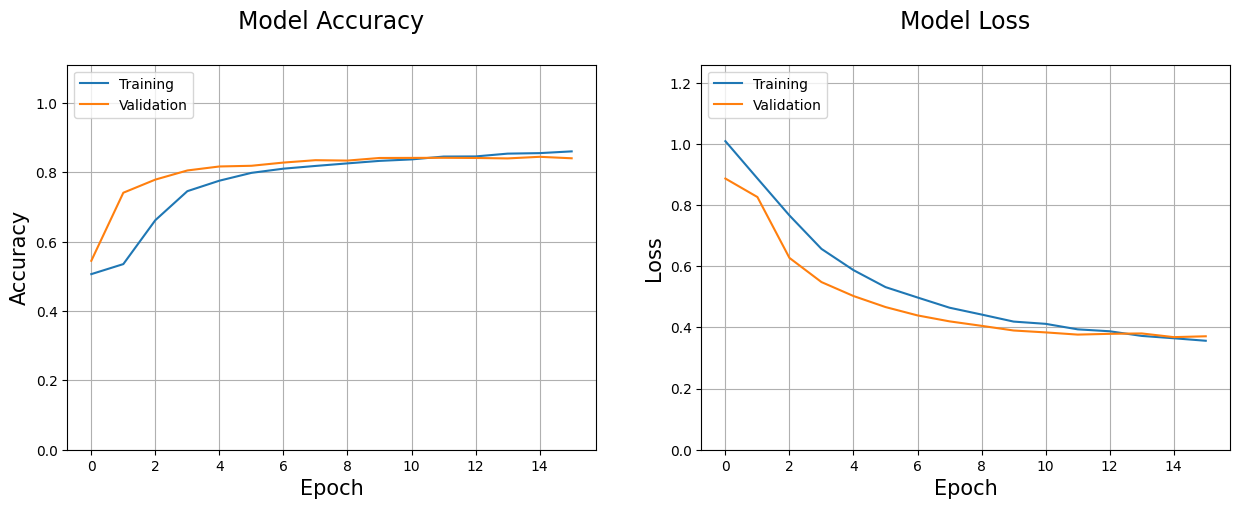

In [ ]:
plot_performance(history)

Same domain
250/250 [==============================] - 1s 3ms/step
0.84075


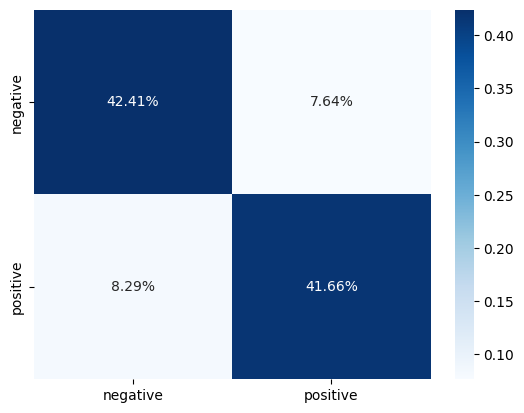

In [ ]:
y_pred = cm(model, "Same domain", x_valid, y_valid)

In [33]:
model = keras.models.load_model('/content/drive/MyDrive/minor_project_sem6/Models/model_cnn8')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          4898300   
                                                                 
 conv1d (Conv1D)             (None, 98, 100)           30100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
y_pred = cm(model, "Before Tuning", x, y)

In [ ]:
# plot_score(y_test, y_pred)

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/minor_project_sem6/Models/model_cnn8_afterTuning')
# tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
for layer in model.layers:
    if layer.name.__contains__("dense"):
      break
    layer.trainable = False

model.fit(tune_ds.shuffle(2000).batch(128),
                    epochs= 1,
                    validation_data = (x_t, y_t),
                    verbose=1)

33/33 [==============================] - 1s 28ms/step - loss: 0.3831 - accuracy: 0.8524 - val_loss: 0.3674 - val_accuracy: 0.8509


After Tuning
410/410 [==============================] - 1s 3ms/step
0.8448868


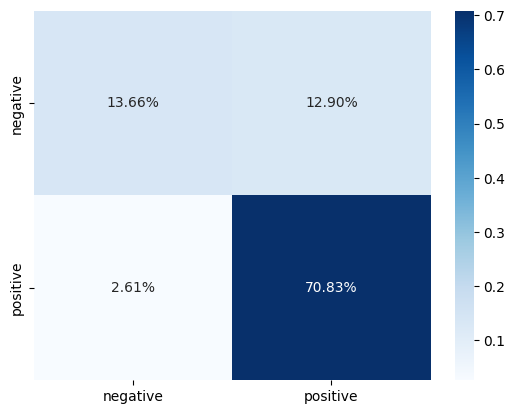

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/minor_project_sem6/Models/model_cnn8_after_Tuning')
y_pred = cm(model, "After Tuning", x, y)

In [ ]:
model.save('/content/drive/MyDrive/minor_project_sem6/Models/model_cnn9_afterTuning')

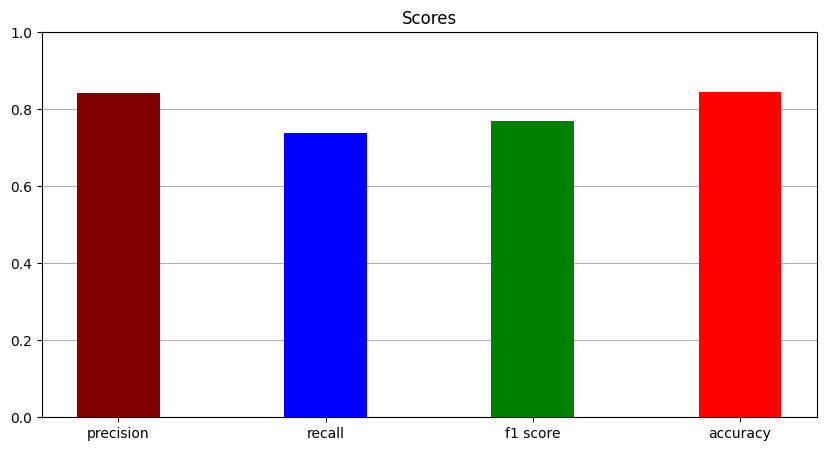

In [ ]:
plot_score(y, y_pred)

#RNN

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          9063900   
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 9,164,501
Trainable params: 9,164,501
Non-trainable params: 0
_________________________________________________________________


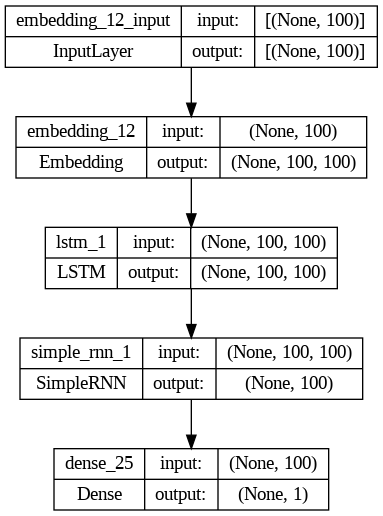

In [ ]:
def get_rnn_model(summary = False):
    # model = Sequential()
    
    # model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=sequence_length))
    # # model.add(LSTM(128,activation = 'relu', kernel_regularizer = l2(0.001), recurrent_dropout=0.2))
    # model.add(Dropout(0.3))
    
    # model.add(LSTM(128, return_sequences=True))
    
    # model.add(Dropout(0.5))
    # model.add(BatchNormalization())

    # model.add(LSTM(128))
    
    # model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    # # # model.add(Dropout(0.5))
    
    # # model.add(Dense(64, activation='relu', kernel_regularizer = l2(0.001)))
    
    # # model.add(Dropout(0.5))
    # # model.add(BatchNormalization())
    # # model.add(Dropout(0.5))
    
    # # model.add(Dense(16, activation='relu', kernel_regularizer = l2(0.001)))
    
    # # model.add(Dropout(0.5))
    # # model.add(BatchNormalization())

    # model.add(Dense(1, activation='sigmoid'))
    # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # if summary:
    #   model.summary()

    # return model
    model = Sequential()
    model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=sequence_length))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1,activation='softmax'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    if summary:
      print(model.summary())
    return model
# model_rnn = get_rnn_model()
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_length, embedding_dim, weights=[embedding_matrix], input_length=sequence_length
                        ,embeddings_regularizer = l2(0.0003)))    

model_rnn.add(LSTM(units=embedding_dim,return_sequences=True))
model_rnn.add(Dropout(0.3))
model_rnn.add(layers.SimpleRNN(units=embedding_dim))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model_rnn.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=1)
tf.keras.utils.plot_model(model_rnn, "multi_input_and_output_model.png", show_shapes=True)  

In [ ]:
history1 = model_rnn.fit(train_ds.shuffle(2000).batch(128),
                    epochs= 10,
                    # validation_split = 0.2,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/10
250/250 [==============================] - 33s 120ms/step - loss: 343.1541 - accuracy: 0.7057 - val_loss: 250.2444 - val_accuracy: 0.7581
Epoch 2/10
250/250 [==============================] - 32s 127ms/step - loss: 185.2607 - accuracy: 0.8110 - val_loss: 130.9734 - val_accuracy: 0.8160
Epoch 3/10
250/250 [==============================] - 31s 126ms/step - loss: 94.6983 - accuracy: 0.8548 - val_loss: 65.1426 - val_accuracy: 0.8400
Epoch 4/10
250/250 [==============================] - 30s 118ms/step - loss: 46.1696 - accuracy: 0.8747 - val_loss: 31.0486 - val_accuracy: 0.8687
Epoch 5/10
250/250 [==============================] - 30s 120ms/step - loss: 21.7201 - accuracy: 0.8899 - val_loss: 14.4783 - val_accuracy: 0.8485
Epoch 6/10
250/250 [==============================] - 29s 117ms/step - loss: 10.0309 - accuracy: 0.8997 - val_loss: 6.7060 - val_accuracy: 0.8655
Epoch 7/10
250/250 [==============================] - 30s 119ms/step - loss: 4.6567 - accuracy: 0.9069 - val_loss: 

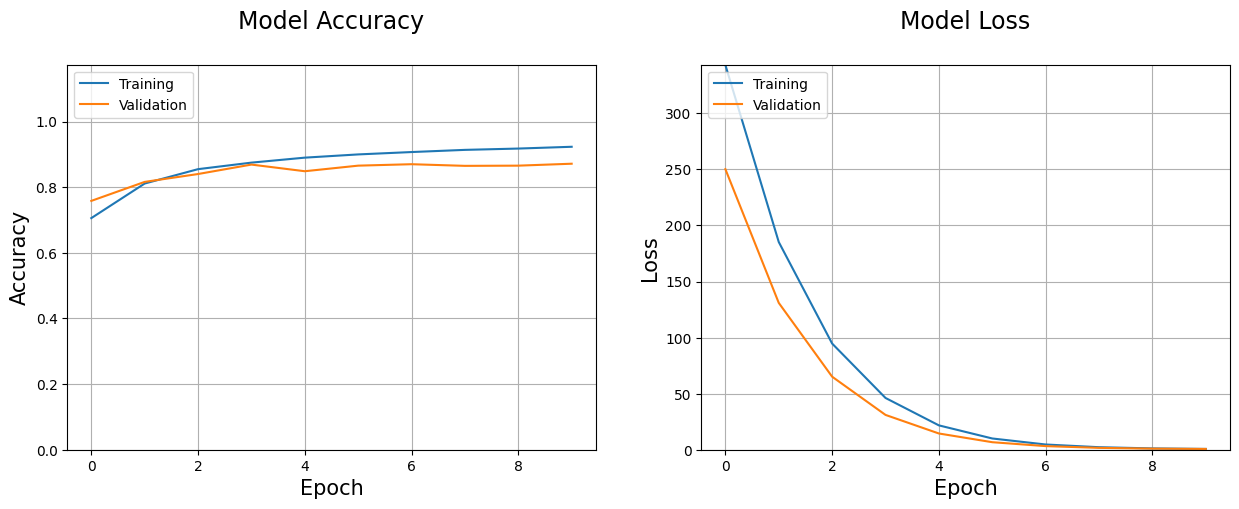

In [ ]:
plot_performance(history1)

Same domain
250/250 [==============================] - 5s 16ms/step
0.871375


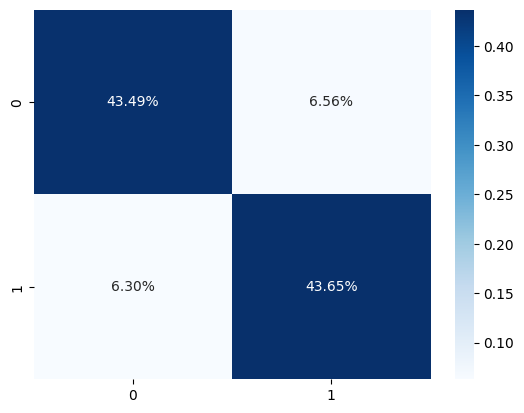

In [ ]:
y_pred = cm(model_rnn, "Same domain", x_valid, y_valid)

In [ ]:
model_rnn = keras.models.load_model('/content/drive/MyDrive/minor_project_sem6/Models/model_rnn')

Before Tuning
513/513 [==============================] - 8s 14ms/step
0.86304295


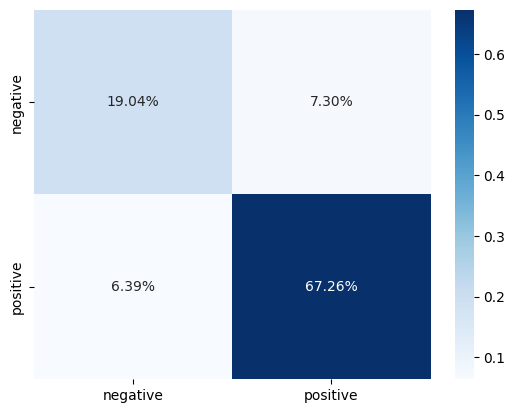

In [ ]:
y_pred = cm(model_rnn, "Before Tuning", x_test, y_test)

In [ ]:
for layer in model_rnn.layers:
    if layer.name.__contains__("dense"):
      break
    layer.trainable = False

model_rnn.fit(tune_ds.shuffle(2000).batch(128), epochs=4, verbose=1)

Epoch 1/4
63/63 [==============================] - 7s 56ms/step - loss: 1.2735 - accuracy: 0.4974
Epoch 2/4
63/63 [==============================] - 3s 45ms/step - loss: 0.9100 - accuracy: 0.4989
Epoch 3/4
63/63 [==============================] - 3s 45ms/step - loss: 0.9015 - accuracy: 0.5025
Epoch 4/4
63/63 [==============================] - 5s 73ms/step - loss: 0.9012 - accuracy: 0.5038


After Tuning
1000/1000 [==============================] - 11s 11ms/step
0.51071876


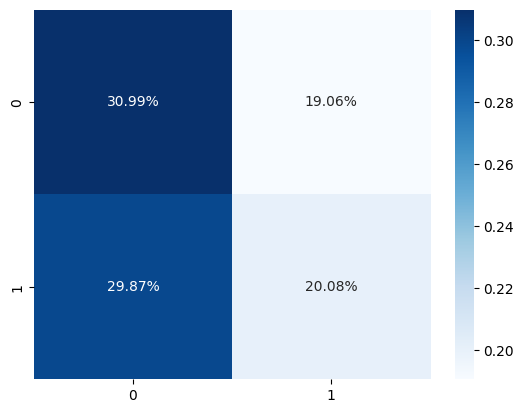

In [ ]:
y_pred = cm(model_rnn, "After Tuning", x_test, y_test)

In [ ]:
model_rnn.save("/content/drive/MyDrive/minor_project_sem6/Models/model_rnn_afterTuning")

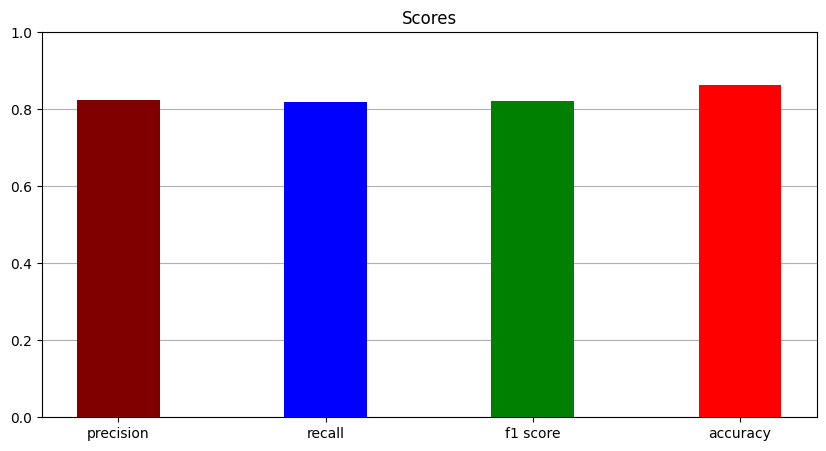

In [ ]:
plot_score(y_test, y_pred)

# CRNN

In [ ]:
model_crnn = Sequential()
model_crnn.add(Embedding(vocab_length, embedding_dim, weights = [embedding_matrix], trainable = False))

model_crnn.add(Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'))
model_crnn.add(MaxPooling1D(pool_size = 3, strides = 1))

model_crnn.add(LSTM(units=embedding_dim,return_sequences=True))
model_crnn.add(Dropout(0.3))

model_crnn.add(layers.SimpleRNN(units=embedding_dim))

model_crnn.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.001)))
model_crnn.add(BatchNormalization())
model_crnn.add(Dropout(0.2))

model_crnn.add(Dense(1, activation='sigmoid'))

model_crnn.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model_crnn.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
tf.keras.utils.plot_model(model_rnn, "multi_input_and_output_model.png", show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 100)         4898300   
                                                                 
 conv1d_13 (Conv1D)          (None, None, 128)         38528     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, None, 100)         91600     
                                                                 
 dropout_26 (Dropout)        (None, None, 100)         0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100)               20100     
                                                      

In [ ]:
history_crnn = model_crnn.fit(train_ds.shuffle(10000).batch(128),
                              epochs = 30,
                              validation_data = valid_ds.shuffle(2000).batch(128),
                              verbose = 1,
                              callbacks = [callback])

Epoch 1/30
129/129 [==============================] - 67s 487ms/step - loss: 0.5990 - accuracy: 0.7351 - val_loss: 0.5885 - val_accuracy: 0.7365
Epoch 2/30
129/129 [==============================] - 45s 347ms/step - loss: 0.5819 - accuracy: 0.7300 - val_loss: 0.5832 - val_accuracy: 0.7365
Epoch 3/30
129/129 [==============================] - 46s 355ms/step - loss: 0.5515 - accuracy: 0.7357 - val_loss: 0.4551 - val_accuracy: 0.8061
Epoch 4/30
129/129 [==============================] - 46s 355ms/step - loss: 0.5353 - accuracy: 0.7449 - val_loss: 0.4671 - val_accuracy: 0.7480
Epoch 5/30
129/129 [==============================] - 43s 331ms/step - loss: 0.4894 - accuracy: 0.7571 - val_loss: 0.4243 - val_accuracy: 0.8141
Epoch 6/30
129/129 [==============================] - 45s 345ms/step - loss: 0.4403 - accuracy: 0.8075 - val_loss: 0.4736 - val_accuracy: 0.7990
Epoch 7/30
129/129 [==============================] - 42s 322ms/step - loss: 0.4082 - accuracy: 0.8337 - val_loss: 0.4072 - val_ac

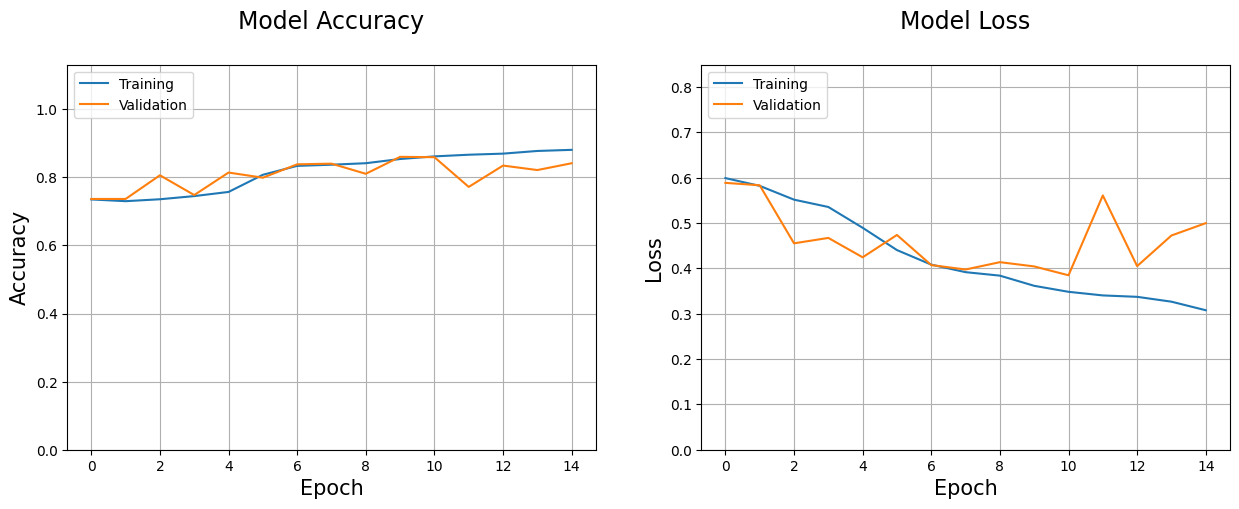

In [ ]:
plot_performance(history_crnn)

In [ ]:
model_crnn.save("/content/drive/MyDrive/minor_project_sem6/model_crnn")

Same Domain
129/129 [==============================] - 5s 32ms/step
0.8699683


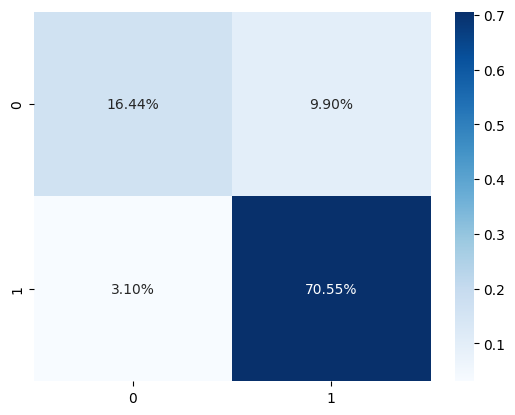

In [ ]:
y_pred = cm(model_crnn, "Same Domain", x_valid, y_valid)

In [ ]:
y_pred = cm(model_crnn, "Before Tuning", x, y)

#RCNN

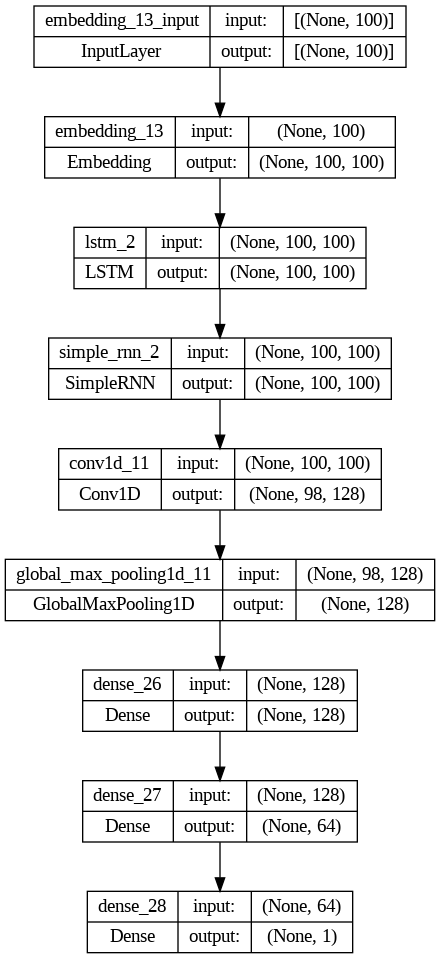

In [ ]:
model_rcnn = Sequential()

model_rcnn.add(Embedding(vocab_length, embedding_dim, weights=[embedding_matrix], input_length=sequence_length,\
                                embeddings_regularizer = l2(0.0005))) 
# drop1 = SpatialDropout1D(0.2)(emb)

model_rcnn.add(LSTM(units=embedding_dim,return_sequences=True))
# model_rcnn.add(Dropout(0.3))

model_rcnn.add(layers.SimpleRNN(units=embedding_dim, return_sequences=True))

# gru = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(emb)

model_rcnn.add(Conv1D(128, 3, padding='valid', activation='relu', strides=1, kernel_regularizer = l2(0.001)))
model_rcnn.add(GlobalMaxPooling1D())
# avg_pool = GlobalAveragePooling1D()(conv)

# merge = concatenate([avg_pool, max_pool])

# model_rcnn.add(Dropout(0.3))
# bnorm1 = BatchNormalization()(drop2)
# model.add(Dropout(0.3))

model_rcnn.add(Dense(128, activation='relu', kernel_regularizer = l2(0.001)))

# model_rcnn.add(Dropout(0.4))
# model_rcnn.add(BatchNormalization())
# model.add(Dropout(0.4))

model_rcnn.add(Dense(64, activation='relu', kernel_regularizer = l2(0.001)))

# model_rcnn.add(Dropout(0.4))
# model_rcnn.add(BatchNormalization())
# model.add(Dropout(0.3))

model_rcnn.add(Dense(1, activation='sigmoid'))
model_rcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model_rcnn = get_rcnn_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
tf.keras.utils.plot_model(model_rcnn, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
history3 = model_rcnn.fit(train_ds.shuffle(2000).batch(128),
                    epochs= 20,
                    # validation_split = 0.2,
                    validation_data=valid_ds,
                    # callbacks = [callback],
                    verbose=1)

Epoch 1/20
  2/129 [..............................] - ETA: 45s - loss: 382.8293 - accuracy: 0.5234 

KeyboardInterrupt: ignored

In [ ]:
# model_rcnn.save("/content/drive/MyDrive/minor_project_sem6/Models/model_rcnn4")

In [ ]:
plot_performance(history3)

In [ ]:
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
  pickle.dump(history3.history, file_pi)

In [36]:
model_rcnn = keras.models.load_model("/content/drive/MyDrive/minor_project_sem6/Models/model_rcnn")

same domain
250/250 [==============================] - 24s 63ms/step
0.8605


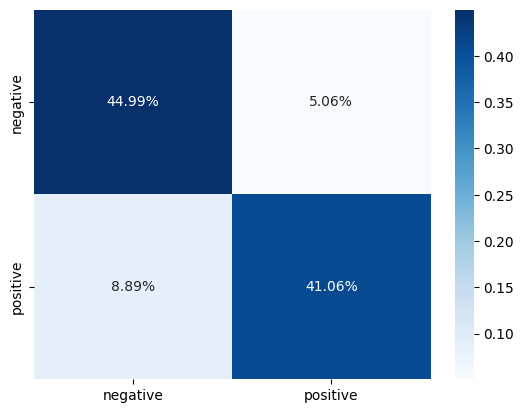

In [55]:
y_pred = cm(model_rcnn, "same domain", x_valid, y_valid)

Before Tuning
410/410 [==============================] - 27s 64ms/step
0.8230763


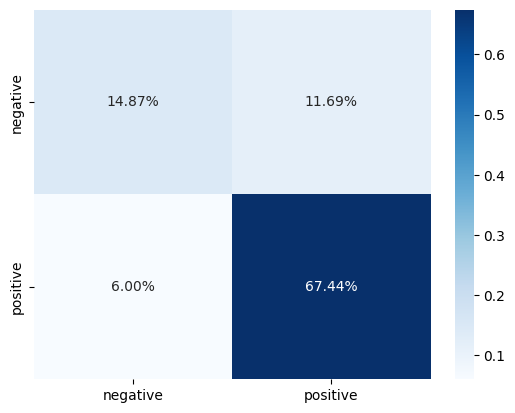

In [56]:
y_pred = cm(model_rcnn, "Before Tuning", x, y)

In [59]:
for layer in model_rcnn.layers:
    if layer.name.__contains__("dense"):
      break
    layer.trainable = False

model_rcnn.fit(tune_ds.shuffle(2000).batch(128), 
               epochs=5, 
               validation_data = (x_t, y_t),
              #  callbacks = [callback],
               verbose=1)

33/33 [==============================] - 39s 1s/step - loss: 0.3355 - accuracy: 0.8844 - val_loss: 0.3392 - val_accuracy: 0.8801


After Tuning
410/410 [==============================] - 29s 71ms/step
0.87638223


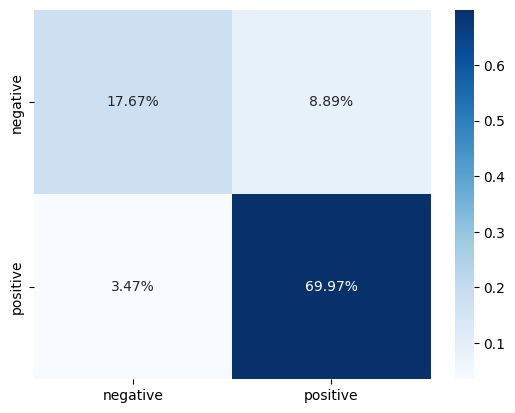

In [61]:
y_pred = cm(model_rcnn, "After Tuning", x, y)

After Tuning
410/410 [==============================] - 25s 61ms/step
0.87638223


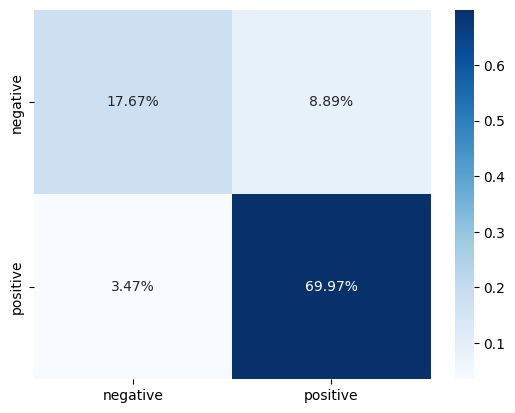

In [60]:
y_pred = cm(model_rcnn, "After Tuning", x, y)

In [64]:
# model_rcnn.save('/content/drive/MyDrive/minor_project_sem6/Models/model_rcnn_afterTraining')

In [96]:
# plot_score(y_test, y_pred)

ValueError: ignored

#Multi Channel CNN

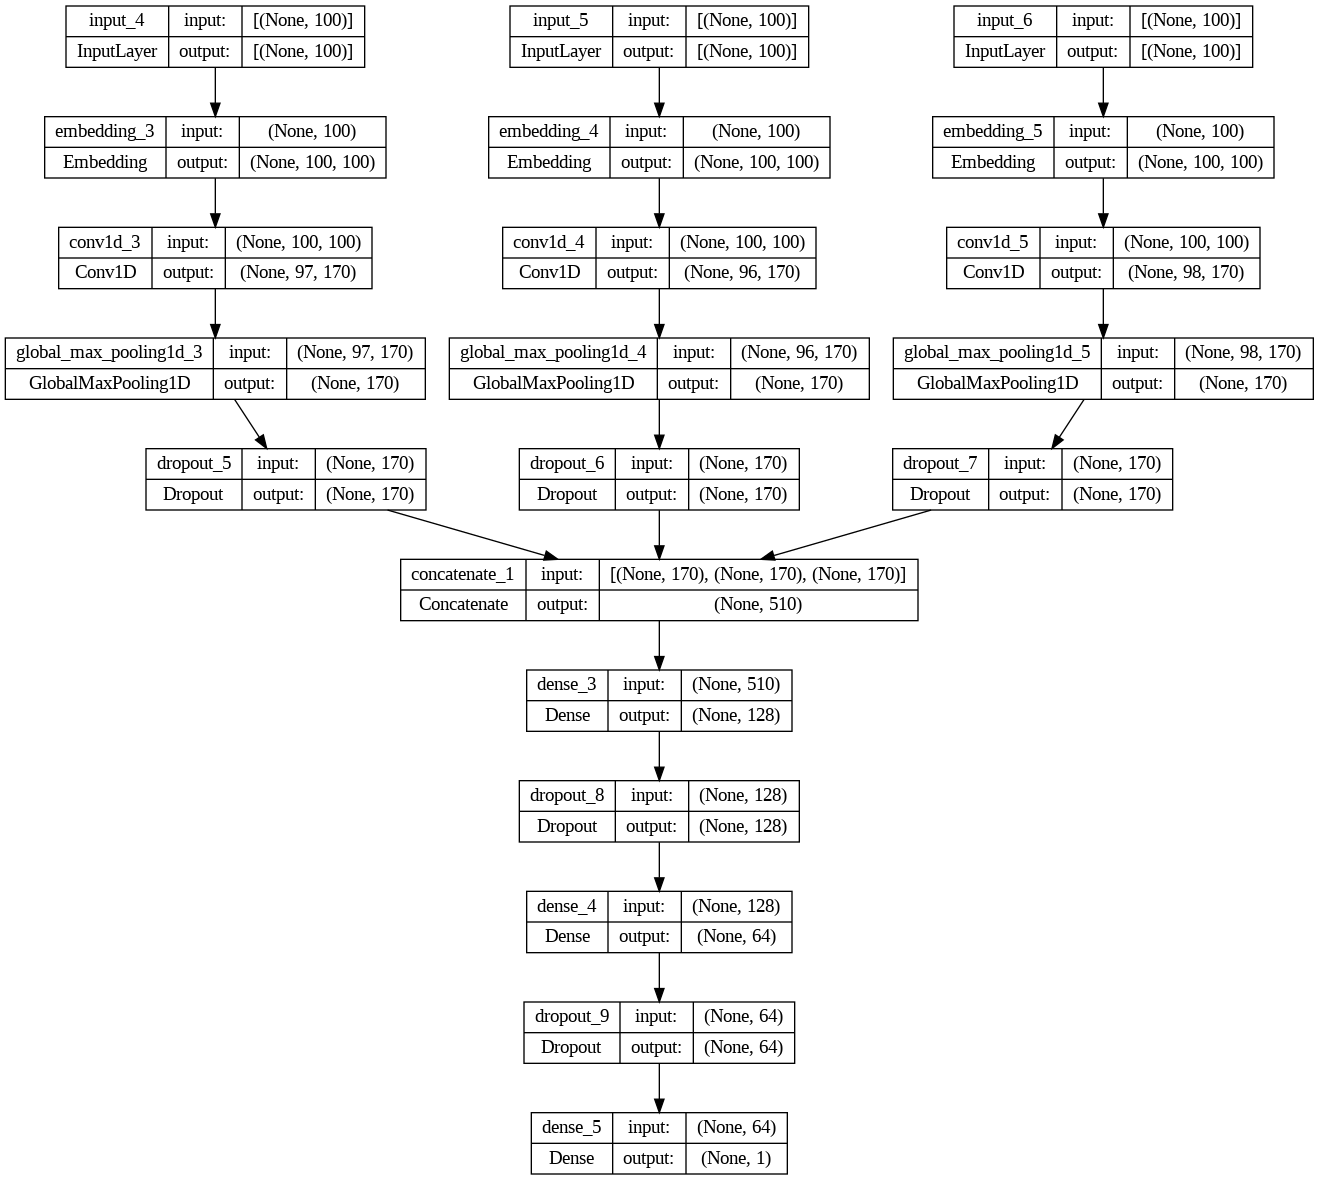

In [77]:
inp1 = Input((embedding_dim,))
emb1 = Embedding(vocab_length, embedding_dim, weights=[embedding_matrix], input_length = sequence_length,trainable = False)(inp1)
conv1 = Conv1D(filters = 170, kernel_size = 4 ,activation = 'relu', padding = 'valid'
              , kernel_regularizer = l2(0.001)
              )(emb1)
pool1 = GlobalMaxPool1D()(conv1)
drop1 = Dropout(0.3)(pool1)
# bnorm1 = BatchNormalization()(drop1)
# drop11 = Dropout(0.3)(bnorm1)

inp2 = Input((embedding_dim,))
emb2 = Embedding(vocab_length, embedding_dim, weights=[embedding_matrix], input_length = sequence_length, trainable = False)(inp2)
conv2 = Conv1D(filters = 170, kernel_size = 5,activation = 'relu', padding = 'valid'
              , kernel_regularizer = l2(0.001)
              )(emb2)
pool2 = GlobalMaxPool1D()(conv2)
drop2 = Dropout(0.3)(pool2)
# bnorm2 = BatchNormalization()(drop2)
# drop21 = Dropout(0.3)(bnorm2)

inp3 = Input((embedding_dim,))
emb3 = Embedding(vocab_length, embedding_dim, weights=[embedding_matrix], input_length = sequence_length, trainable = False)(inp3)
conv3 = Conv1D(filters = 170, kernel_size = 3 ,activation = 'relu', padding = 'valid'
              , kernel_regularizer = l2(0.001)
              )(emb3)
pool3 = GlobalMaxPool1D()(conv3)
drop3 = Dropout(0.3)(pool3)
# bnorm3 = BatchNormalization()(drop3)
# drop31 = Dropout(0.3)(bnorm3)

merge = concatenate([drop1, drop2, drop3])
# print(merge)
dense1 = Dense(128, activation = 'relu'
              , kernel_regularizer = l2(0.001)
              )(merge)
drop4 = Dropout(0.3)(dense1)
# bnorm4 = BatchNormalization()(drop4)
# drop41 = Dropout(0.3)(bnorm4)

dense2 = Dense(64, activation = 'relu'
              , kernel_regularizer = l2(0.001)
                )(drop4)
              # )(bnorm4)
drop5 = Dropout(0.3)(dense2)
# bnorm5 = BatchNormalization()(drop5)
# drop51 = Dropout(0.3)(bnorm5)

# dense3 = Dense(16, activation = 'relu'
#               , kernel_regularizer = l2(0.001)
#                 )(drop5)
#               # )(bnorm5)
# drop6= Dropout(0.2)(dense3)
# bnorm6 = BatchNormalization()(drop6)
# drop61 = Dropout(0.3)(bnorm6)

output = Dense(1, activation = 'sigmoid')(drop5)
# output = Dense(1, activation = 'sigmoid')(bnorm6)

model_multicnn = keras.Model(inputs = [inp1, inp2, inp3], outputs = output)
model_multicnn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
tf.keras.utils.plot_model(model_multicnn, "multi_input_and_output_model.png", show_shapes=True)

In [78]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=1)
history4 = model_multicnn.fit([x_train, x_train, x_train], np.array(y_train),
                   epochs = 15,
                   callbacks = [callback],
                   validation_data=([x_valid, x_valid, x_valid], np.array(y_valid)),
                   verbose = 1)
# history5 = model_multicnn.fit([x_train,x_train,x_train], np.array(y_train),epochs=10)

Epoch 1/15
1000/1000 [==============================] - 9s 7ms/step - loss: 0.8255 - accuracy: 0.7346 - val_loss: 0.5516 - val_accuracy: 0.8364
Epoch 2/15
1000/1000 [==============================] - 5s 5ms/step - loss: 0.5385 - accuracy: 0.8237 - val_loss: 0.5180 - val_accuracy: 0.8188
Epoch 3/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4908 - accuracy: 0.8357 - val_loss: 0.4640 - val_accuracy: 0.8486
Epoch 4/15
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4692 - accuracy: 0.8456 - val_loss: 0.4702 - val_accuracy: 0.8388
Epoch 5/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4602 - accuracy: 0.8518 - val_loss: 0.4765 - val_accuracy: 0.8455
Epoch 6/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4477 - accuracy: 0.8588 - val_loss: 0.4593 - val_accuracy: 0.8506
Epoch 7/15
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4437 - accuracy: 0.8602 - val_loss: 0.4732 - val_accuracy:

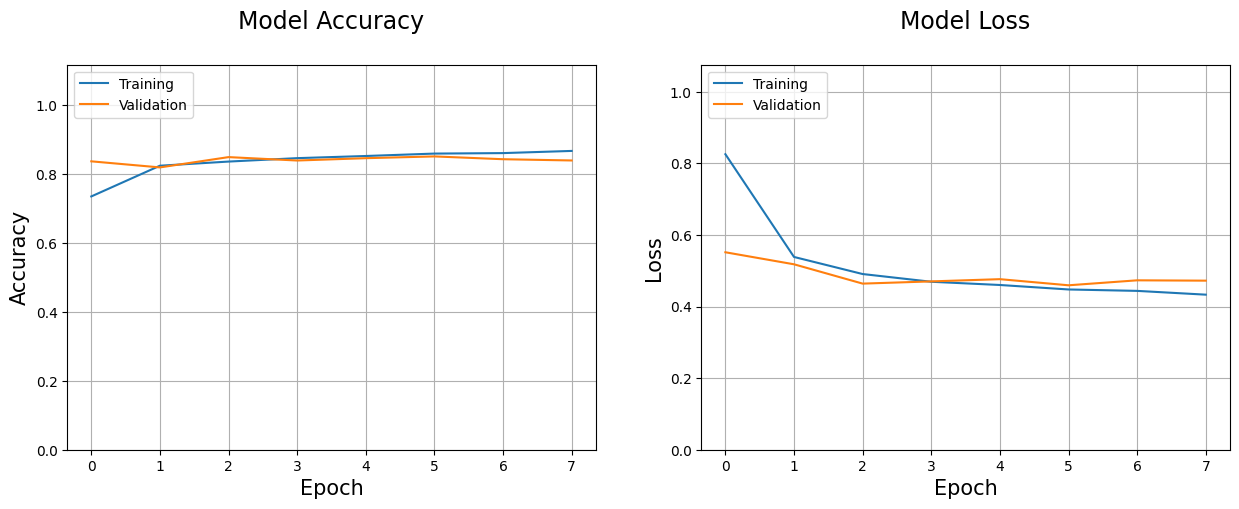

In [79]:
plot_performance(history4)

In [80]:
# model_multicnn.save("/content/drive/MyDrive/minor_project_sem6/multi_cnn3")

In [81]:
# model_multicnn = keras.models.load_model('/content/drive/MyDrive/minor_project_sem6/Models/multi_cnn2_afterTuning')

Same Domain
250/250 [==============================] - 1s 3ms/step
0.838875


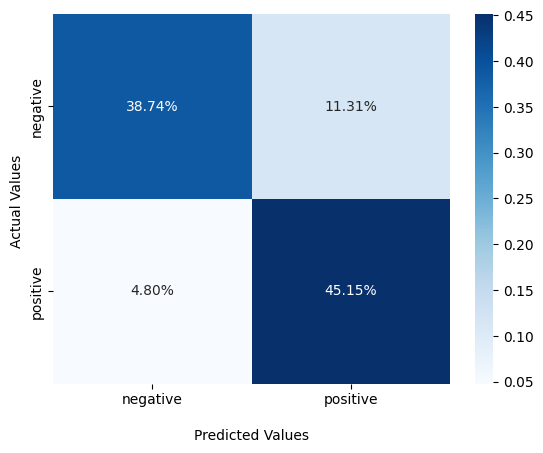

In [82]:
y_pred = cm_multi(model_multicnn, "Same Domain", x_valid, np.array(y_valid))

Before Tuning
410/410 [==============================] - 1s 2ms/step
0.82063603


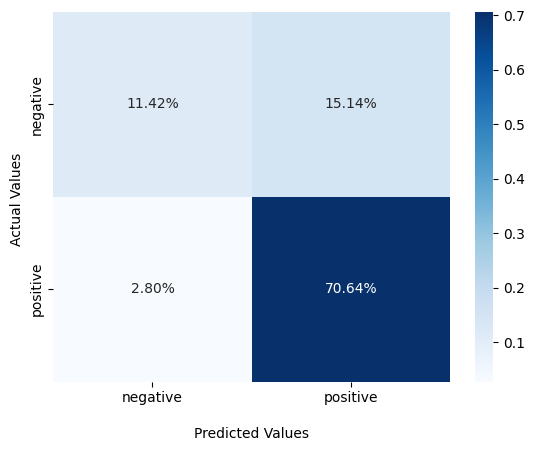

In [83]:
y_pred = cm_multi(model_multicnn, "Before Tuning", x, y)

In [94]:
for layer in model_multicnn.layers:
    if layer.name.__contains__("dense"):
      break
    layer.trainable = False
model_multicnn.fit([x_tune] * 3, np.array(y_tune), 
                   epochs = 1, validation_data = ([x_t] * 3, y_t),
                   verbose = 1)

129/129 [==============================] - 1s 9ms/step - loss: 0.2421 - accuracy: 0.9627 - val_loss: 0.5302 - val_accuracy: 0.8686


After Tuning
410/410 [==============================] - 1s 2ms/step
0.85472435


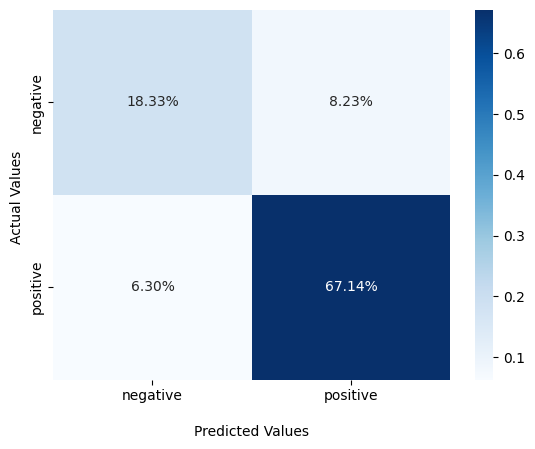

In [95]:
y_pred = cm_multi(model_multicnn, "After Tuning", x, y)

After Tuning
410/410 [==============================] - 1s 2ms/step
0.86006254


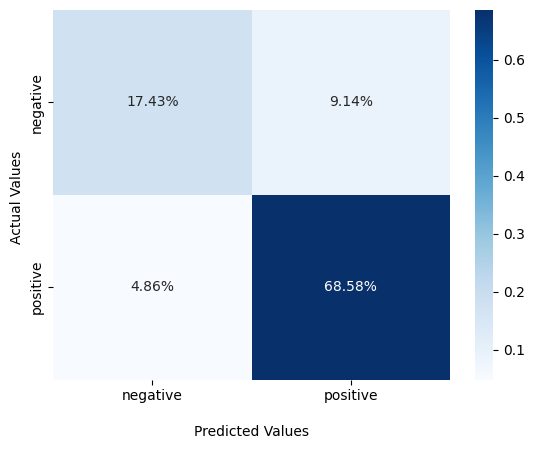

In [88]:
y_pred = cm_multi(model_multicnn, "After Tuning", x, y)

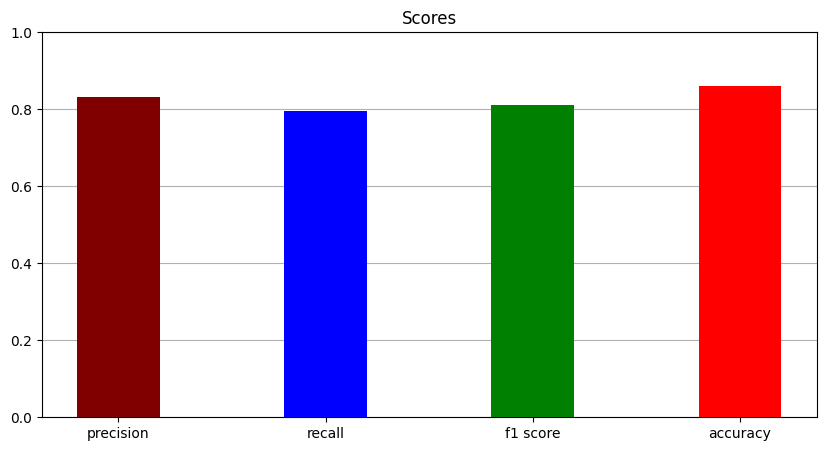

In [89]:
plot_score(y, y_pred)